
******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        8
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality c

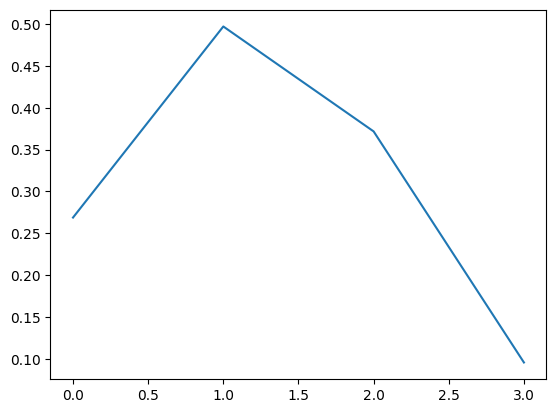

In [1]:
from casadi import *
from matplotlib.pyplot import plot, show

x = MX.sym('x',2)  # Two states
p = MX.sym('p')    # Free parameter

# Expression for ODE right-hand side
z = 1-x[1]**2;
rhs = vertcat(z*x[0]-x[1]+2*tanh(p),x[0])

# ODE declaration with free parameter
ode = {'x':x,'p':p,'ode':rhs}

# Construct a Function that integrates over 1s
F = integrator('F','cvodes',ode,0,1)

# Control vector
u = MX.sym('u',4,1)

x = [0,1]  # Initial state
for k in range(4):
  # Integrate 1s forward in time:
  # call integrator symbolically
  res = F(x0=x,p=u[k])
  x = res['xf']


# NLP declaration
nlp = {'x':u,'f':dot(u,u),'g':x}

# Solve using IPOPT
solver = nlpsol('solver','ipopt',nlp)
res = solver(x0=0.2,lbg=0,ubg=0)

plot(res['x'])
show()